## Метрики кластеризации
**1. Внутрикластерное расстояние** 
$$\sum_{k=1}^k\sum_{i=1}^l [a(x_i)=k] d(x_i, C_k) \rightarrow \min$$

где $[a(x_i)=k]$ - индикатор принадлежности к кластеру $k$

$d(x_i, C_k)$ - расстояние от точки $x_i$ до центра кластера $C_k$

**2. Межкластерное расстояние**
$$\sum_{i,j=1}^l[a(x_i)\neq a(x_j)]d(x_i, x_j) \rightarrow \max$$

где $[a(x_i)\neq a(x_j)]$ - индикатор соответствия точек разным кластерам

$d(x_i, x_j)$ - расстояние между точками

**3. Индекс Данна (DannaIndex)**
$$\frac{\min d(k, k')}{\max(d(k))} \rightarrow \max$$

где $\min d(k, k')$ - минимальное расстояние между кластерами

$\max(d(k))$ - максимальное внутрикластерное расстояние k-го кластера

**4. Силуэт**

$$\frac{b - a}{\max(a, b)}$$

где a - среднее расстояние от данного объекта до объектов из того же кластера

b - среднее расстояние от данного объекта до объектов из ближайщего кластера (отличного от того в котором лежит сам объект)

## Методы кластеризации
1. K-Means (вход число кластеров) рассмотрен далее..
2. Affinity Propagation (не требует заранее определять число кластеров) ```sklearn.cluster.AffinityPropagation```
3. Спектральная кластеризация (вход число кластеров) ```sklearn.cluster.SpectralClustering```
4. Агломеративная кластеризация (вход число кластеров) ```sklearn.cluster.AgglomerativeClustering```

## K-Means
Алгоритм k-средних:
1. Выбрать количество кластеров $k$, которое нам кажется оптимальным для наших данных (случай когда нет представления о количестве кластеров рассмотрен ниже)
2. Высыпать случайным образом (или не очень случайным) в пространство наших данных $k$ точек (центроидов)
3. Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе
4. Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду
5. Повторять шаги 3 и 4 фиксированное число раз, либо до тех пор пока центроиды на "сойдутся" (малое приращение при перемещении)

### Реализация K-Means на python

#### Подключение необходимых библиотек

In [88]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#### Реализация класса KMeans

In [265]:
class KMeansMy():
    #инициализация
    def __init__(self, n_clusters, random_state=None, max_iter=4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        if random_state is None:
            self.random_state = np.random.randint(1, 1000)
        else:
            self.random_state = random_state
        np.random.seed(seed = self.random_state)
    
    #обучение модели
    def fit(self, X):
        self.X = X
        self.init_centroids()
        self.labels_history_ = []
        for i in range(self.max_iter):
            #расчет расстояния до центроидов
            distances = cdist(X, self.cent_history_[-1])
            #устранение проблемы с отсутствием точек у центроида
            distances[np.isnan(distances)] = 100
            #выбор ближайшего центроида
            labels = distances.argmin(axis=1)
            self.labels_history_.append(labels)
            #обновление расположения центроидов
            centroids = self.cent_history_[-1].copy()
            for k in range(self.n_clusters):
                #проверка на отсутствие точек у центроида чтобы не изменять его на nan
                if len(X[labels == k]) != 0:
                    centroids[k, :] = np.mean(X[labels == k], axis=0)                
            self.cent_history_.append(centroids)
        self.count_inertia()
    
    #инициализация центроидов
    def init_centroids(self):
        centroids = np.random.normal(loc=0.0, scale=1., size=self.X.shape[1]*self.n_clusters)
        centroids = centroids.reshape((self.n_clusters, self.X.shape[1]))
        self.cent_history_ = []
        self.cent_history_.append(centroids)
    
    #расчет внутрикластерного расстояния
    def count_inertia(self):
        self.inertia_ = np.sum((cdist(X, self.cent_history_[-1])**2).min(axis=1))

#### Генерируем данные для проверки

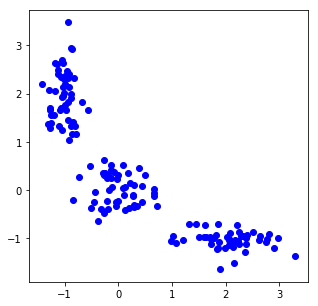

In [266]:
X = np.zeros((150, 2))

np.random.seed(seed=123)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.show()

#### Применяем модель

In [267]:
kmeansmy = KMeansMy(3, max_iter=4, random_state=123)
kmeansmy.fit(X)

#### Визуализация результата работы

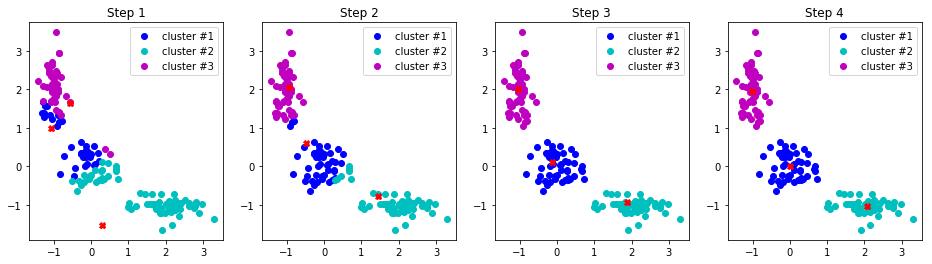

In [268]:
plt.figure(figsize=(16, 4))
for i in range(4):
    labels = kmeansmy.labels_history_[i]
    centroids = kmeansmy.cent_history_[i]
    
    plt.subplot(1, 4, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label = 'cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label = 'cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label = 'cluster #3')
    plt.plot(centroids[:, 0], centroids[:, 1], 'rX')
    plt.legend(loc=0)
    plt.title(f'Step {i + 1}')

**P.S.** конечно реализация sklearn обладает горадздо большим функционалам и приятными бонусами, например наличие параметра n_init - количество запусков для получения более устойчевого расстояния (возможно параллельное вычисление)

### Выбор количества кластеров по внутрикластерному расстоянию
При неизвестном количестве кластеров мы можем строить несколько моделей и смотреть на убывание метрики (например внутрикластерного расстояния) и когда убывание "затухает" выбирать данное значение числа кластеров как оптимальное. Покажем это графически. 

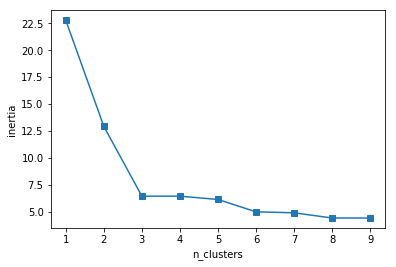

In [272]:
inertia = []
for i in range(1, 10):
    kmeansmy = KMeansMy(i, max_iter=4, random_state=123)
    kmeansmy.fit(X)
    inertia.append(np.sqrt(kmeansmy.inertia_))

plt.plot(range(1, 10), inertia, marker='s')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

Собственно падение внутрикластерного расстояния (на наших синтетических данных) очевидно "затухает" после 3-го кластера, соответственно оптимальное число кластеров 3.